In [2]:
import tensorflow as tf
import numpy as np
import PIL.Image as Image
import cv2

from tensorflow.keras import layers, models
import tensorflow_hub as hub

import matplotlib.pyplot as plt

In [3]:
IMAGE_SHAPE = (224,224)

In [4]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [5]:
model = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3,))
])

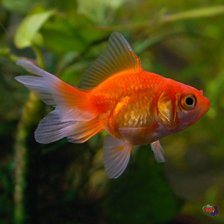

In [6]:
gold_fish = Image.open('gold_fish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.32941176, 0.07058824],
         [0.31372549, 0.36862745, 0.09411765],
         [0.34901961, 0.41568627, 0.1254902 ],
         ...,
         [0.32941176, 0.39215686, 0.01176471],
         [0.3254902 , 0.38039216, 0.01176471],
         [0.30980392, 0.36862745, 0.00784314]],

        [[0.29019608, 0.3372549 , 0.07843137],
         [0.32941176, 0.38431373, 0.10980392],
         [0.35686275, 0.41960784, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00784314],
         [0.30196078, 0.35686275, 0.00392157]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31764706, 0.36470588, 0.10588235],
         [0.34901961, 0.41176471, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00784314],
         [0.30980392, 0.36862745, 0.01176471],
         [0.29803922, 0.35294118, 0.00784314]],

        ...,

        [[0.05490196, 0.10980392, 0.01960784],
         [0.05098039, 0.10980392, 0.01960784]

In [9]:
result = model.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
tf.keras.utils.get_file('image_net_labels.txt', cache_dir = '.',  origin="https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")

24576/10484 [======================================================================] - 0s 0us/step


'.\\datasets\\image_net_labels.txt'

In [12]:
with open('datasets\\image_net_labels.txt', 'r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_label_index]

'goldfish'

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [19]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='C:\Code\deep_learning', untar=True)

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [21]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
}

flowers_labels_dict = {
    'roses' : 0,
    'daisy': 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips': 4,
}

flowers_images_dict['roses'][0]

WindowsPath('C:/Code/deep_learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [22]:
str(flowers_images_dict['roses'][0])

'C:\\Code\\deep_learning\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [23]:
x = []
y = []

In [24]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    
x = np.array(x)
y = np.array(y)

TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

PREPROCESSING: SCALE IMAGES

In [26]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

MAKE PREDICTION USING PRE-TRAINED MODEL ON NEW FLOWERS DATASET

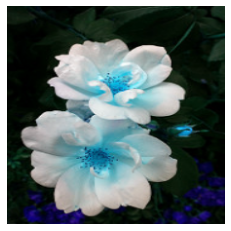

In [27]:
plt.axis('off')
plt.imshow(x[0])

In [28]:
predicted = model.predict(np.array([x[0]]))
predicted = np.argmax(predicted)
predicted

795

In [29]:
image_labels[795] # as you can see it predict flower image as shower curtain

'shower curtain'

# 2 - NOW TAKE CARE PRE-TRAINED MODEL AND RETRAIN IT USING FLOWERS IMAGES

In [30]:
feature_extactor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extactor_model, trainable=False, input_shape=(224,224,3))

In [31]:
num_of_flowers = 5
model_2 = tf.keras.models.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model_2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [34]:
model_2.fit(x_train_scaled, y_train, epochs=5) # loss:0.23  acc:0.92

Epoch 1/5
86/86 [==============================] - 114s 918ms/step - loss: 2.3352 - accuracy: 0.4230
Epoch 2/5
86/86 [==============================] - 77s 896ms/step - loss: 1.5667 - accuracy: 0.4629
Epoch 3/5
86/86 [==============================] - 79s 915ms/step - loss: 1.5667 - accuracy: 0.4629
Epoch 4/5
86/86 [==============================] - 77s 891ms/step - loss: 1.5667 - accuracy: 0.4629
Epoch 5/5
86/86 [==============================] - 76s 883ms/step - loss: 1.5667 - accuracy: 0.4629


In [ ]:
model_2.evaluate(x_test_scaled, y_test)  # loss: 0.37  acc: 0.86